In [113]:
from inertia_tensors.inertia_tensors import inertia_tensors
from inertia_tensors.utils import sample_ellipsoidal_volume

# Inertia Tensor Demo

In [143]:
coords = sample_ellipsoidal_volume(100, [1.0,0.7])

In [144]:
from rotations.vector_utilities import angles_between_list_of_vectors
from matplotlib.collections import PatchCollection
from matplotlib.patches import Ellipse

I = inertia_tensors(coords[np.newaxis,:,:])
evals, evecs = np.linalg.eigh(I)
evals = evals/np.max(evals)

a = evals[0,1]
b = evals[0,0]

v1 = evecs[0,1,:]
ux = np.array([-1,0])

misalignment_angle = np.degrees(angles_between_list_of_vectors([ux],[v1]))

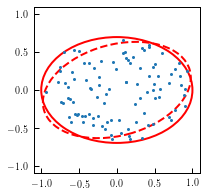

In [145]:
ellipse_0 = Ellipse([0,0], 1*2, 0.7*2, angle=0,
                  edgecolor='red', lw=2, facecolor='none')

ellipse_1 = Ellipse([0,0], a*2, b*2, angle=misalignment_angle,
                    edgecolor='red', lw=2, facecolor='none', linestyle='--')

fig, ax = plt.subplots(1,1, figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.plot(coords[:,0], coords[:,1], '.', ms=4)
ax.add_artist(ellipse_0)
ax.add_artist(ellipse_1)

plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])
plt.show()